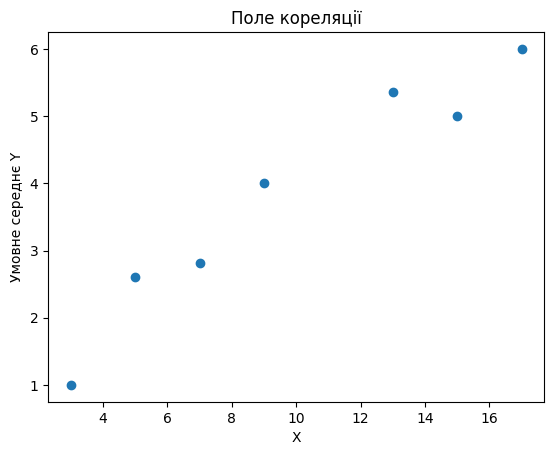

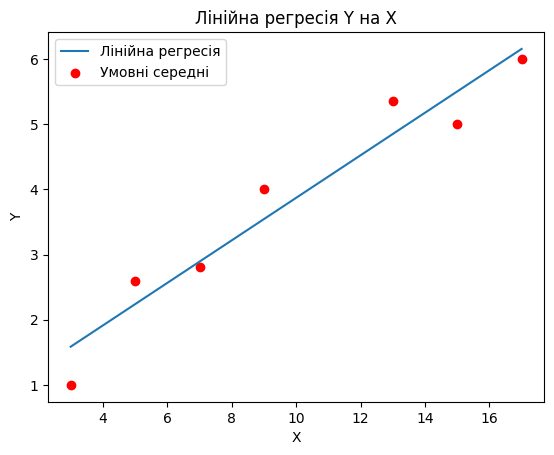

Рівняння регресії: Y = 0.3263578393976582X + 0.6074301801054752
Дисперсія: 1.0777588643220632
Сума квадратів відхилень: 1.2217356060139395


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Дані з таблиці
x_values = [3, 5, 7, 9, 13, 15, 17]
frequencies = [
    [23, None, None, None, None, None, None],
    [None, 2, 19, None, None, None, None],
    [None, 3, 32, 2, None, None, None],
    [None, None, 8, 23, 5, None, None],
    [None, None, None, 2, 17, 4, None],
    [None, None, None, None, 20, None, 3]
]

# Обчислення умовних середніх
def calculate_conditional_means(x_values, frequencies):
    y_means = []
    for i, x in enumerate(x_values):
        sum_y = 0
        count = 0
        for j in range(len(frequencies)):
            if frequencies[j][i] is not None:
                sum_y += frequencies[j][i] * (j + 1)
                count += frequencies[j][i]
        y_means.append(sum_y / count if count != 0 else None)
    return y_means

y_means = calculate_conditional_means(x_values, frequencies)

# Побудова поля кореляції
plt.scatter(x_values, y_means)
plt.xlabel('X')
plt.ylabel('Умовне середнє Y')
plt.title('Поле кореляції')
plt.show()

# Припущення про функцію регресії
# Наприклад, лінійна регресія
coefficients = np.polyfit(x_values, y_means, 1)
linear_regression = np.poly1d(coefficients)

# Побудова графіка регресії
x_range = np.linspace(min(x_values), max(x_values), 100)
plt.plot(x_range, linear_regression(x_range), label='Лінійна регресія')
plt.scatter(x_values, y_means, color='red', label='Умовні середні')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Лінійна регресія Y на X')
plt.show()

# Запис рівняння регресії
print(f'Рівняння регресії: Y = {coefficients[0]}X + {coefficients[1]}')

# Обчислення дисперсії Y відносно кривої регресії
y_values = [1, 1.5, 2, 3, 3.5, 4]
observed_y = []
predicted_y = []

for i, x in enumerate(x_values):
    for j in range(len(frequencies)):
        if frequencies[j][i] is not None:
            observed_y.extend([y_values[j]] * frequencies[j][i])
            predicted_y.extend([linear_regression(x)] * frequencies[j][i])

# Дисперсія
observed_y = np.array(observed_y)
predicted_y = np.array(predicted_y)
variance = np.mean((observed_y - predicted_y) ** 2)
print(f'Дисперсія: {variance}')

# Сума квадратів відхилень умовних середніх від значень функції регресії
delta_squared = np.sum((np.array(y_means) - linear_regression(np.array(x_values))) ** 2)
print(f'Сума квадратів відхилень: {delta_squared}')
